In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Stress.csv')
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [4]:
df.size

19866

Checking for missing values

In [5]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [21]:
from scipy.stats import zscore

numeric_column = 'confidence'
# Z-Score
z_scores = zscore(df[numeric_column])
outliers = (abs(z_scores) > 3)  # You can adjust the threshold (e.g., 3) based on your data

# Display the rows with outliers
outliers_df = df[outliers]

print("Outliers using Z-Score:")

Outliers using Z-Score:


In [6]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [7]:
df['subreddit'].value_counts()


subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

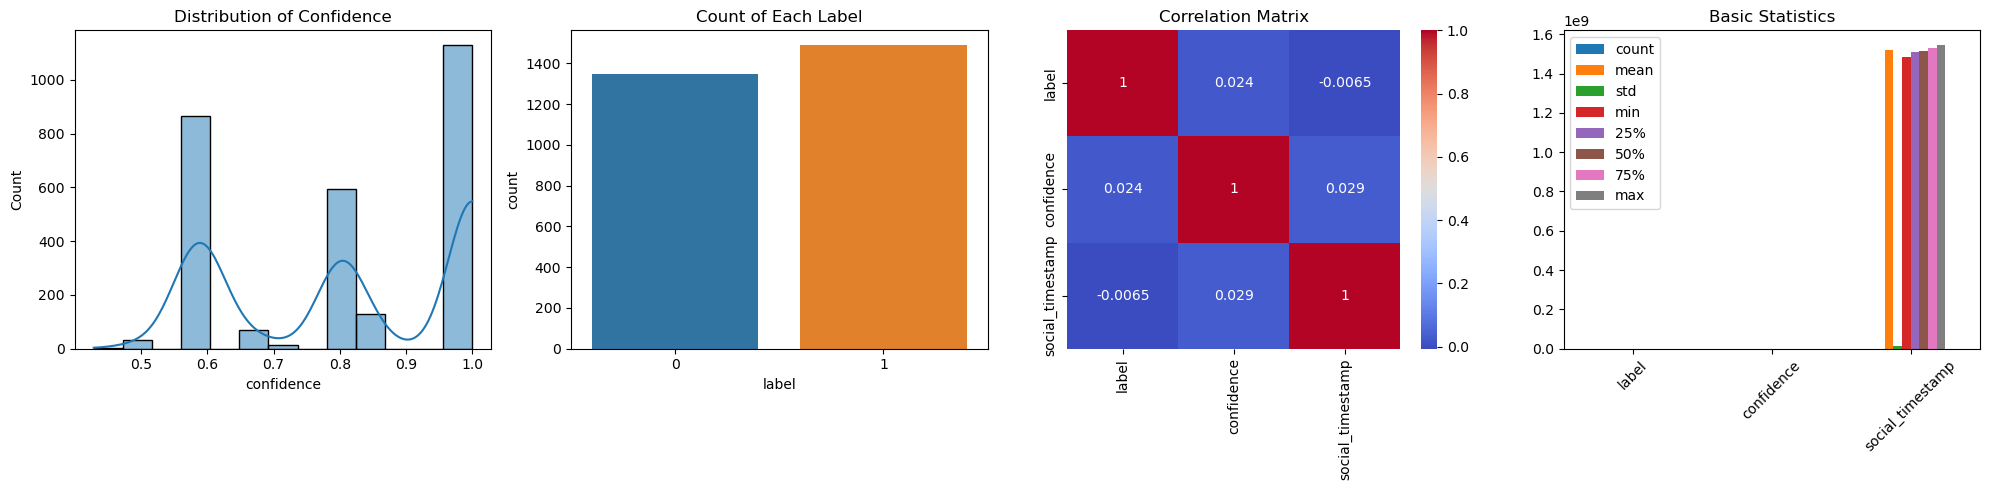

In [24]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Visualize the distribution of the 'confidence' column
sns.histplot(df['confidence'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Confidence')

# Visualize the count of each label
sns.countplot(x='label', data=df, ax=axes[1])
axes[1].set_title('Count of Each Label')

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Correlation Matrix')

# Display basic statistics
df.describe().transpose().plot(kind='bar', ax=axes[3], rot=45)
axes[3].set_title('Basic Statistics')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
# 1. Distribution of Confidence
mean_confidence = df['confidence'].mean()
median_confidence = df['confidence'].median()
print(f"Mean Confidence: {mean_confidence}")
print(f"Median Confidence: {median_confidence}")

# 2. Count of Each Label
count_label_0 = df[df['label'] == 0].shape[0]
count_label_1 = df[df['label'] == 1].shape[0]
print(f"Count of Label 0: {count_label_0}")
print(f"Count of Label 1: {count_label_1}")

Mean Confidence: 0.8089717775147992
Median Confidence: 0.8
Count of Label 0: 1350
Count of Label 1: 1488


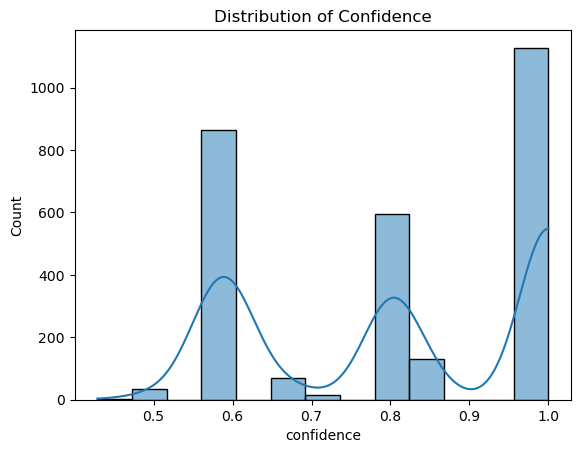

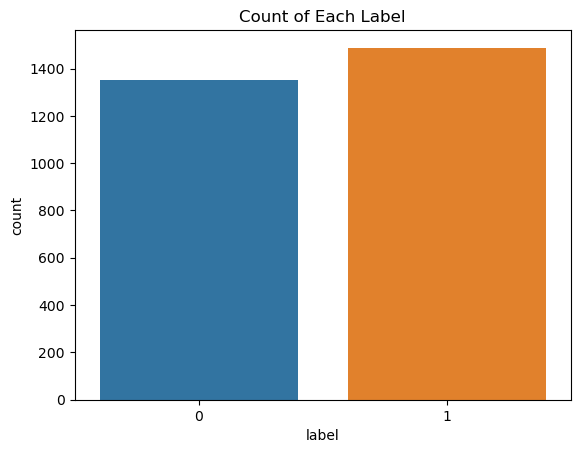

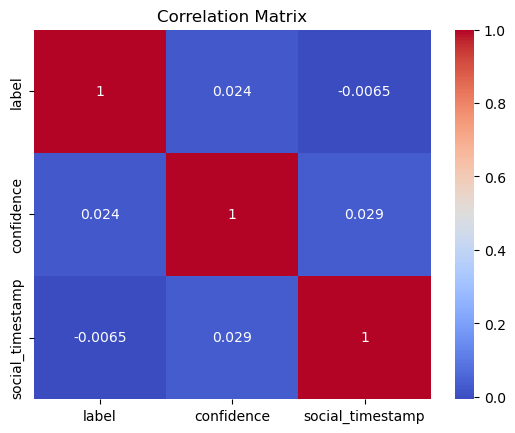

In [23]:
# Visualize the distribution of the 'confidence' column
sns.histplot(df['confidence'], kde=True)
plt.title('Distribution of Confidence')
plt.show()

# Visualize the count of each label
sns.countplot(x='label', data=df)
plt.title('Count of Each Label')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Bar Chart of Subreddit Counts:

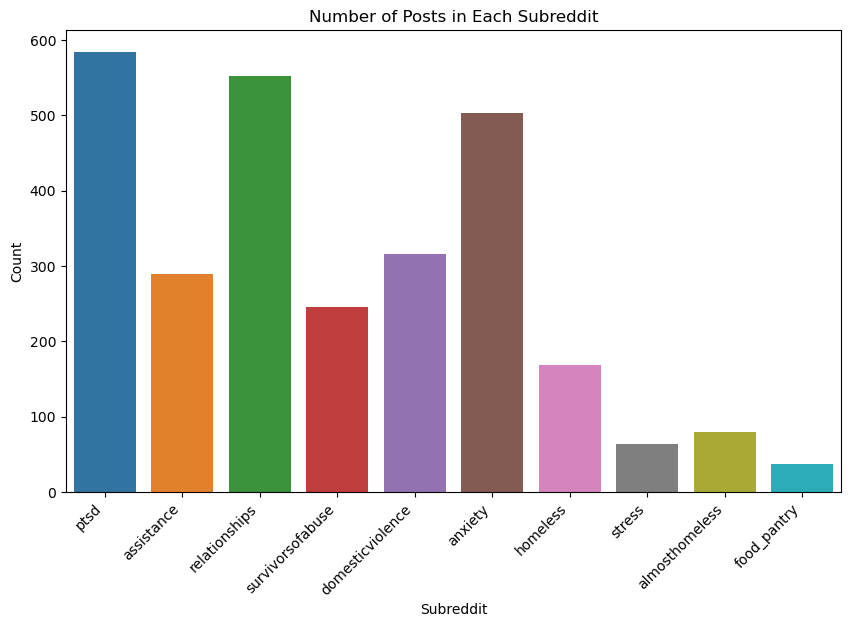

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=df)
plt.title('Number of Posts in Each Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


[('.', 12008), (',', 8862), ("n't", 2026), ('’', 1721), ("'m", 1272), ("'s", 1207), ('like', 1153), (')', 1020), ('?', 994), ('(', 982), ('know', 851), ('get', 845), ('would', 790), ('time', 754), ('feel', 751), ('*', 721), ('really', 637), ("'ve", 569), ('want', 563), ('even', 545)]


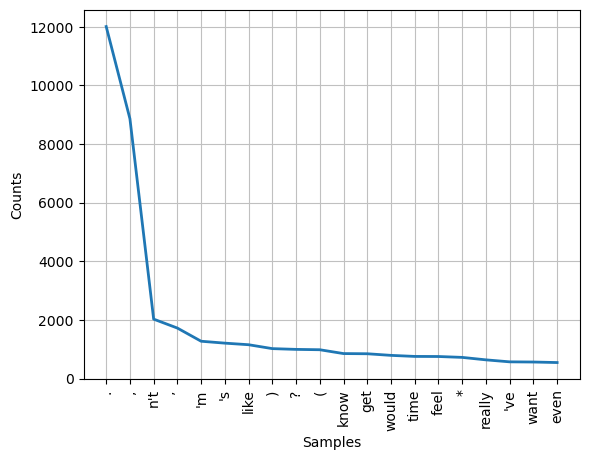

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Column "text" contains posts 
posts_text = df['text']

# Combining all text into a single string
all_text = ' '.join(posts_text)

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove stopwords (common words like 'the', 'and', etc.)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate word frequencies
freq_dist = FreqDist(filtered_tokens)

# Display the top 20 most common words
print(freq_dist.most_common(20))

# Plot a word frequency distribution
freq_dist.plot(20, cumulative=False)
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


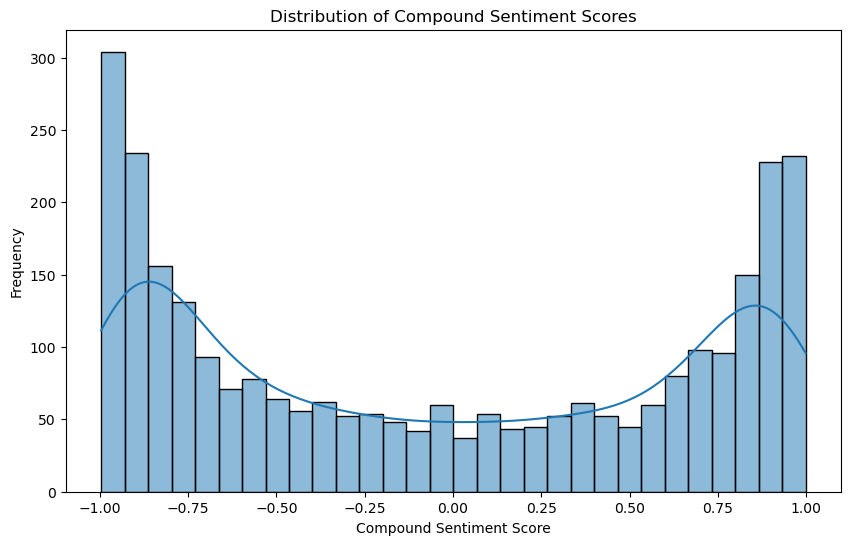

In [10]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

#'text' is the column containing the post content 
posts_text = df['text']

# Initializing the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
sentiment_scores = posts_text.apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score (a combined measure of positivity/negativity)
df['compound_score'] = sentiment_scores.apply(lambda x: x['compound'])

# Plot a histogram of compound sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound_score'], bins=30, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')


posts_text = df['text']

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
sentiment_scores = posts_text.apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score (a combined measure of positivity/negativity)
df['compound_score'] = sentiment_scores.apply(lambda x: x['compound'])

# Display the DataFrame with the calculated sentiment scores
print(df[['text', 'compound_score']])


[nltk_data] Downloading package vader_lexicon to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                   text  compound_score
0     He said he had not felt that way before, sugge...         -0.8551
1     Hey there r/assistance, Not sure if this is th...          0.9897
2     My mom then hit me with the newspaper and it s...         -0.0402
3     until i met my new boyfriend, he is amazing, h...         -0.9933
4     October is Domestic Violence Awareness Month a...         -0.9622
...                                                 ...             ...
2833  * Her, a week ago: Precious, how are you? (I i...          0.9718
2834  I don't have the ability to cope with it anymo...         -0.9941
2835  In case this is the first time you're reading ...          0.8555
2836  Do you find this normal? They have a good rela...          0.7913
2837  I was talking to my mom this morning and she s...         -0.9569

[2838 rows x 2 columns]


In [12]:
# Assuming 'compound_score' is the column containing sentiment scores in your DataFrame

# Categorize sentiments based on thresholds
df['sentiment_category'] = pd.cut(df['compound_score'], bins=[-float('inf'), -0.05, 0.05, float('inf')], labels=['negative', 'neutral', 'positive'])

# Count the number of posts in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Display the counts
print(sentiment_counts)


sentiment_category
negative    1456
positive    1308
neutral       74
Name: count, dtype: int64


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenization and Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size

# Fit and transform on the training data
X_train_tfidf = vectorizer.fit_transform(train_data['text'])

# Transform the test data
X_test_tfidf = vectorizer.transform(test_data['text'])

# Display the shape of the resulting TF-IDF matrices
print("Shape of TF-IDF matrix for training data:", X_train_tfidf.shape)
print("Shape of TF-IDF matrix for test data:", X_test_tfidf.shape)

# Now, X_train_tfidf and X_test_tfidf contain the vectorized representations of the text data


Shape of TF-IDF matrix for training data: (2270, 5000)
Shape of TF-IDF matrix for test data: (568, 5000)


In [16]:
# Assuming 'compound_score' is the column containing sentiment scores in your DataFrame

# Categorize sentiments based on thresholds
df['sentiment_category'] = pd.cut(df['compound_score'], bins=[-float('inf'), -0.05, 0.05, float('inf')], labels=['negative', 'neutral', 'positive'])

# Count the number of posts in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Display the counts
print(sentiment_counts)


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'text' is the column containing the post content in your DataFrame
posts_text = df['text']

# Assuming 'label' is the column containing the labels in your DataFrame
labels = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(posts_text, labels, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size

# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting TF-IDF matrices
print("Shape of TF-IDF matrix for training data:", X_train_tfidf.shape)
print("Shape of TF-IDF matrix for test data:", X_test_tfidf.shape)

# Now, X_train_tfidf and X_test_tfidf contain the vectorized representations of the text data


sentiment_category
negative    1456
positive    1308
neutral       74
Name: count, dtype: int64
Shape of TF-IDF matrix for training data: (2270, 5000)
Shape of TF-IDF matrix for test data: (568, 5000)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df = df.drop(['post_id', 'sentence_range', 'social_timestamp'], axis=1)

# Encode categorical labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_features = tfidf_vectorizer.fit_transform(train_data)
test_features = tfidf_vectorizer.transform(test_data)

In [29]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    cleaned_text = re.sub('[^A-Za-z\s]', '', text)
    
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(cleaned_text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_text)

    # Remove extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())

    # Lemmatization (optional, depending on use case)
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(cleaned_text)])

    return lemmatized_text

# Example usage:
original_text = "This is an example sentence with some special characters, numbers, and stopwords!"
preprocessed_text = preprocess_text(original_text)
print(preprocessed_text)


example sentence special character number stopwords


In [30]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')


df = pd.DataFrame({'text': ["Sample text with unnecessary characters and stop words."]})

# Function to clean text
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in string.punctuation]
    
    # Remove stop words
    stop_words_set = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned DataFrame
print(df[['text', 'cleaned_text']])


[nltk_data] Downloading package stopwords to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0  Sample text with unnecessary characters and st...   

                                    cleaned_text  
0  sample text unnecessary characters stop words  


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

posts_text = df['text']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_posts = posts_text.apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_posts)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_posts]

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf.fit_transform(posts_text)

# LDA Model
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Display the top keywords for each topic
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f'Topic #{topic_idx + 1}: {", ".join(top_keywords)}')

# Assign topics to each post
df['topic'] = lda.transform(tfidf_matrix).argmax(axis=1)

# Display the DataFrame with assigned topics
print(df[['text', 'topic']])


[nltk_data] Downloading package stopwords to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #1: just, ve, like, don, know, want, really, time, feel, years
Topic #2: like, just, know, don, feel, time, want, ve, people, really
Topic #3: help, know, time, just, don, survey, ve, job, like, family
Topic #4: like, just, feel, don, help, know, time, really, ve, think
Topic #5: just, like, don, feel, know, time, want, ve, really, help
                                                   text  topic
0     He said he had not felt that way before, sugge...      3
1     Hey there r/assistance, Not sure if this is th...      2
2     My mom then hit me with the newspaper and it s...      0
3     until i met my new boyfriend, he is amazing, h...      0
4     October is Domestic Violence Awareness Month a...      0
...                                                 ...    ...
2833  * Her, a week ago: Precious, how are you? (I i...      0
2834  I don't have the ability to cope with it anymo...      1
2835  In case this is the first time you're reading ...      1
2836  Do you find this no